In [9]:
import json
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

current_path = os.path.abspath(os.getcwd())
sys.path.append(f"{current_path}/../libs")

from plot import plot_confusion_matrix, plot_table, plot_multiple_lines
from dataframe import read_dataset, split_train_test
from report import dataset_info_report, model_report, feature_selection_report
from preprocess import remove_sparse_rows, remove_sparse_columns, under_sampling, one_hot_encoded
from feature_selection import get_k_best, fs_results_filter
from cross_validation import get_folds
from config import load_config

### 1. Configs

In [10]:
# Reading Configs and Defining Constants and Globals
config = load_config("../config.yaml")
fs_report = {}

### 2. Reports

In [11]:
# Reading Stability Results and Models Results
with open(config.REPORT_PATH+'stability-result.json', 'r') as fp:
    stability_report = json.load(fp)

# with open(config.REPORT_PATH+'models-result.json', 'r') as fp:
with open(config.REPORT_PATH+'models-result-new.json', 'r') as fp:
    models_report = json.load(fp)

### 3. Stability Between Folds

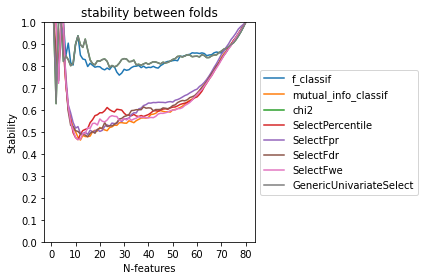

In [12]:
# Stability Between Folds Using Concatenated Dataset
labels = stability_report["between-folds"].keys()
result =[]
n = []
for fs_model, datasets in stability_report["between-folds"].items():
    for n_features, stability in datasets["concatenated-dataset"].items():
        n.append(len(datasets["concatenated-dataset"]))
x_len = min(n)
for fs_model, datasets in stability_report["between-folds"].items():
    y=[]
    for n_features, stability in datasets["concatenated-dataset"].items():
        if int(n_features.split(" ")[0]) <= x_len:
            y.append(stability)
    result.append(y)
x = list(range(1,x_len+1))
path = f"{config.PLOTS_PATH}/methods/"
if not os.path.exists(path):
    os.makedirs(path)
plot_multiple_lines(x,result,labels,path=f"{path}stability-between-folds",title="stability between folds",axis_label = ("N-features","Stability"))

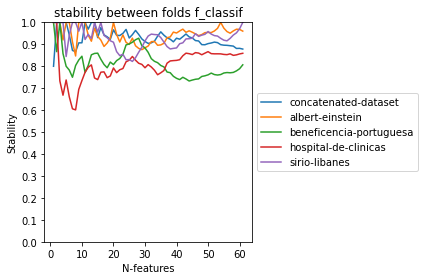

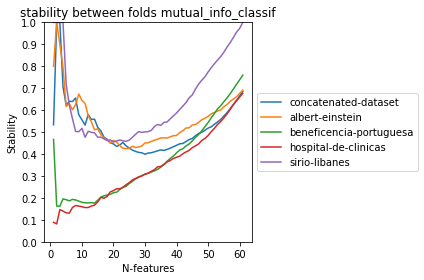

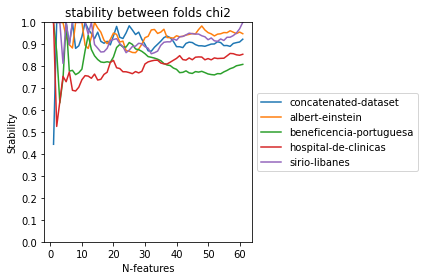

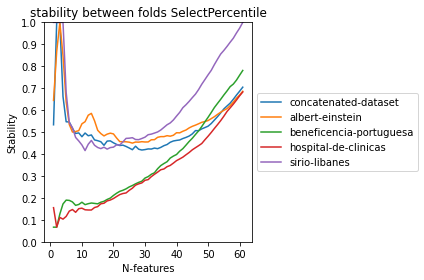

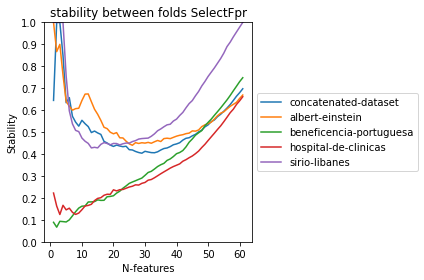

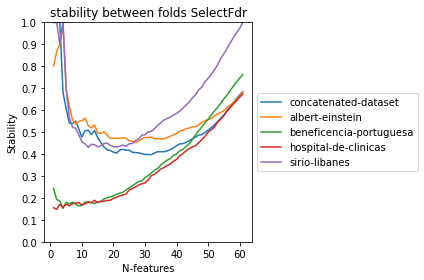

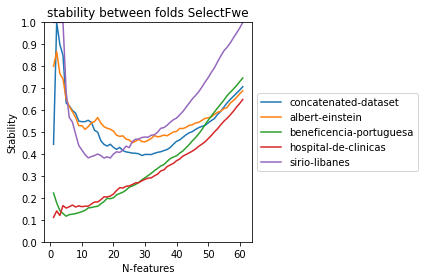

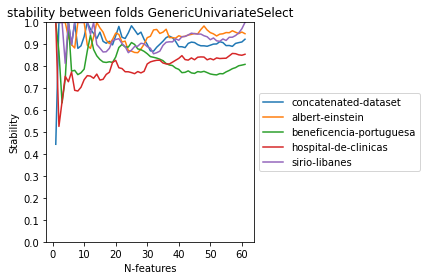

In [13]:
# Stabilitty Between Folds Using Each Dataset
for fs_model, datasets in stability_report["between-folds"].items():
    labels = datasets.keys()
    result =[]
    n = min([len(s) for s in datasets.values()])
    x = list(range(1,n+1))
    for dataset, features in datasets.items():
        if dataset != "concatenated-dataset":
            y=[]
            for n_features, stability in features.items():
                if int(n_features.split(" ")[0]) <= n:
                    y.append(stability)
            result.append(y)
    path = f"{config.PLOTS_PATH}/methods/between-folds/"
    if not os.path.exists(path):
        os.makedirs(path)
    plot_multiple_lines(x,result,labels,path=f"{path}{fs_model}",title=f"stability between folds {fs_model}",axis_label = ("N-features","Stability"))
   

### 4. Stability Between Models

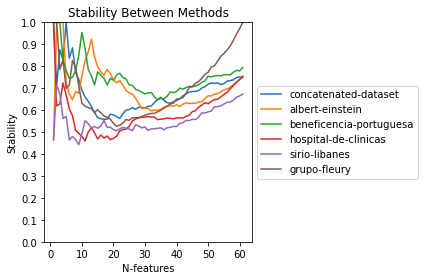

In [14]:
# Stabilitty Between Models
labels = stability_report["between-methods"].keys()
result =[]
n = min([len(s) for s in stability_report["between-methods"].values()])
x = list(range(1,n+1))
for dataset, stability in stability_report["between-methods"].items():
    y=[]
    for n_features, stability in stability.items():
        if int(n_features.split(" ")[0]) <= n:
            y.append(stability)
    result.append(y)
path = f"{config.PLOTS_PATH}/methods/"
if not os.path.exists(path):
    os.makedirs(path)
plot_multiple_lines(x,result,labels,path=f"{path}stability-between-methods",title=f"Stability Between Methods",axis_label = ("N-features","Stability"))

### 5. Stability Between Datasets

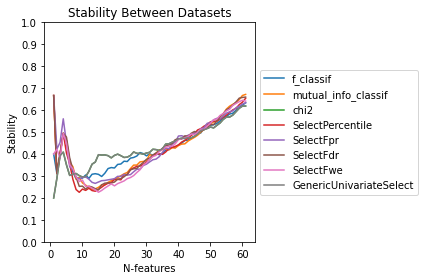

In [15]:
# Stabilitty Between Dataset
labels = stability_report["between-datasets"].keys()
result =[]
n = min([len(s) for s in stability_report["between-datasets"].values()])
x = list(range(1,n+1))
for fs_models, stability in stability_report["between-datasets"].items():
    y=[]
    for n_features, stability in stability.items():
        if int(n_features.split(" ")[0]) <= n:
            y.append(stability)
    result.append(y)
path = f"{config.PLOTS_PATH}/methods/"
if not os.path.exists(path):
    os.makedirs(path)
plot_multiple_lines(x,result,labels,path=f"{path}stability-between-datasets",title=f"Stability Between Datasets",axis_label = ("N-features","Stability"))

### 6. ML Models Metrics

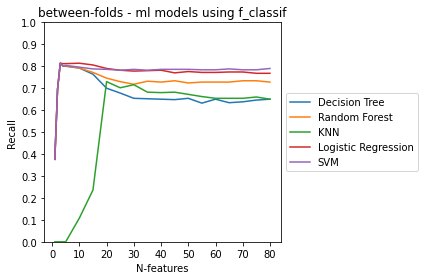

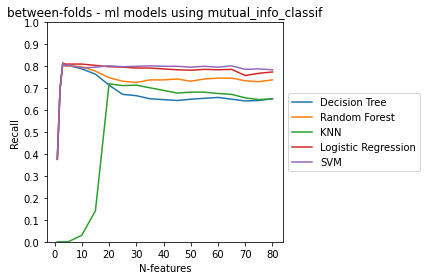

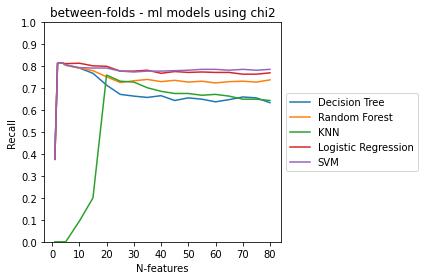

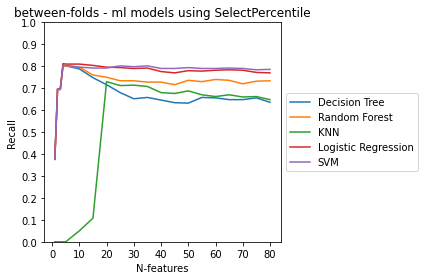

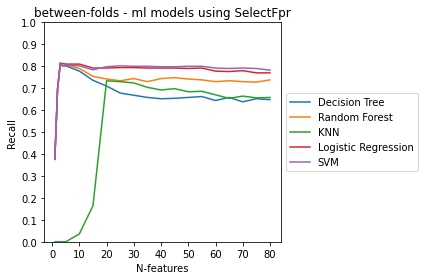

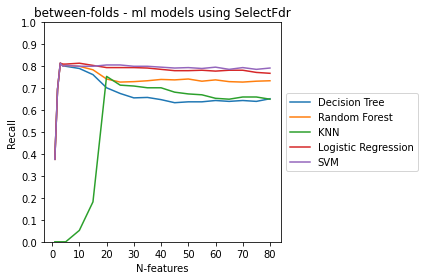

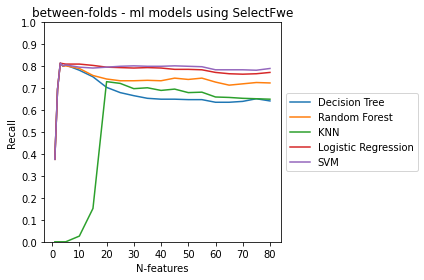

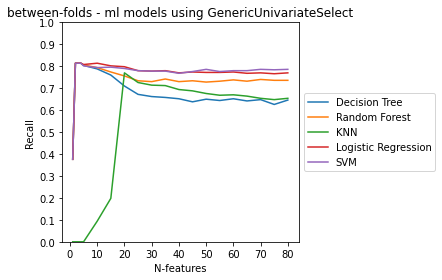

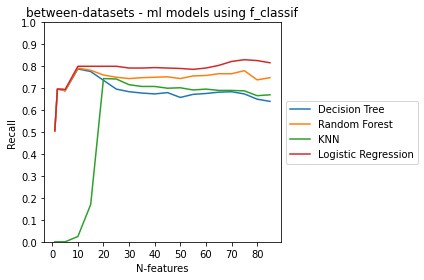

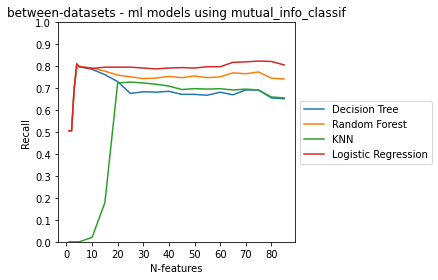

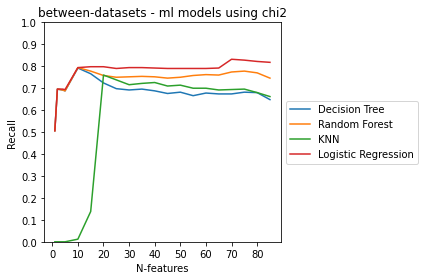

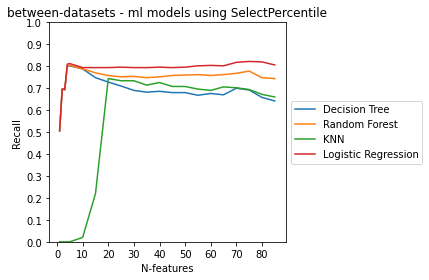

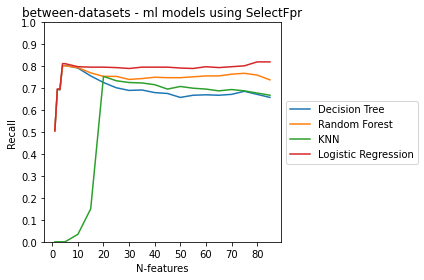

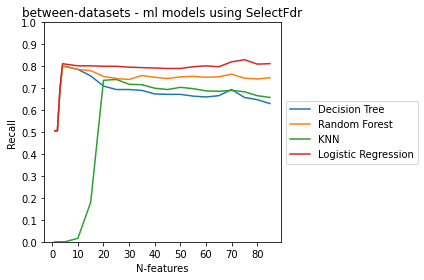

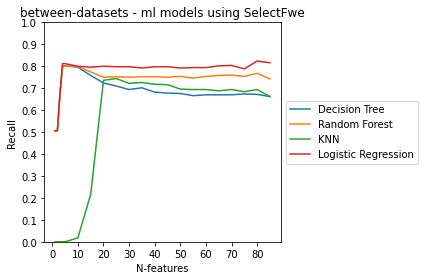

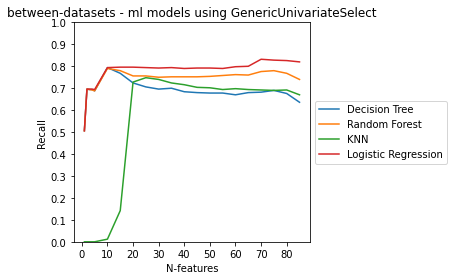

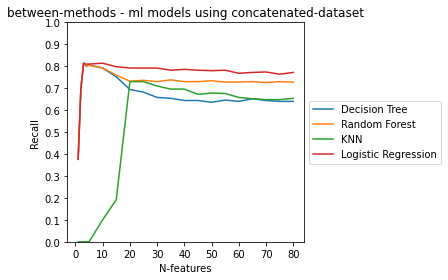

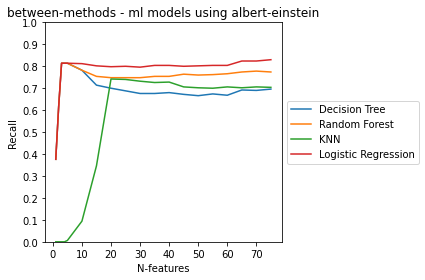

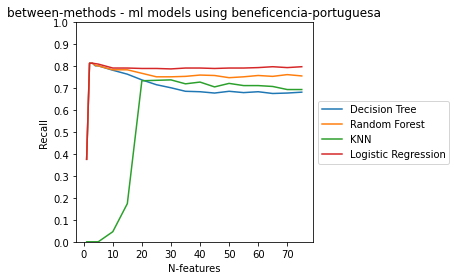

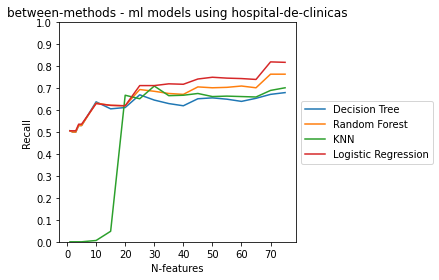

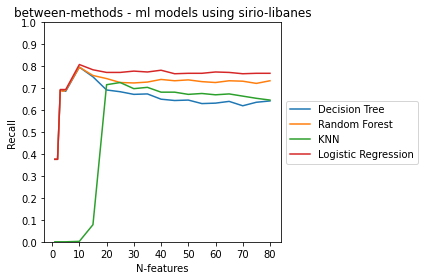

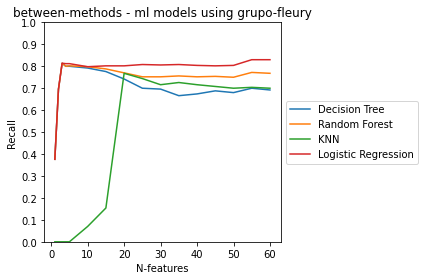

In [16]:
# ML Models Metrics
for strategy, results in models_report.items():
    for item, ml_models in results.items():
        labels = ml_models.keys()
        result =[]
        x = []
        n = 1000
        for model, features in ml_models.items():
            possible_x = [int(n_features.split(" ")[0]) for n_features in features.keys()]
            if max(possible_x) < n:
                x = possible_x
                n = max(possible_x)
        for model, features in ml_models.items():
            y=[]
            for n_features, metrics in features.items():
                if int(n_features.split(" ")[0]) <= n:
                    y.append(metrics["recall"])
            result.append(y)
        path = f"{config.PLOTS_PATH}/models/{strategy}/"
        if not os.path.exists(path):
            os.makedirs(path)
        plot_multiple_lines(x,result,labels,path=f"{path}{item}",title=f"{strategy} - ml models using {item}",axis_label = ("N-features","Recall"))
    